<a href="https://colab.research.google.com/github/god59814/cs101/blob/main/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install mplfinance
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
import talib as ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


Enter the stock ticker (e.g., 2330.TW for TSMC): 2330.TW
Enter the indicators you want to view (e.g., MACD, RSI): MACD


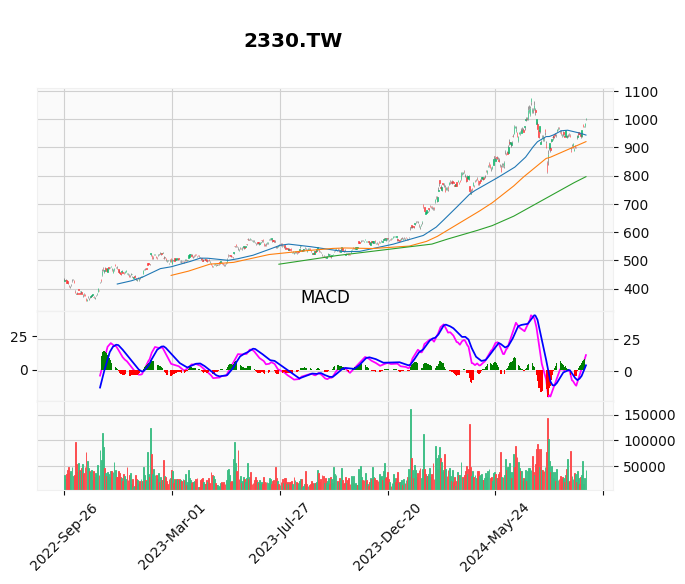

In [10]:
import yfinance as yf
import mplfinance as mpf
import talib as ta

# Get user input for stock ticker and indicators
ticker_name = input("Enter the stock ticker (e.g., 2330.TW for TSMC): ")
indicators_input = input("Enter the indicators you want to view (e.g., MACD, RSI): ").upper().split(',')

# Fetch the stock data
yticker = yf.Ticker(ticker_name)
data = yticker.history(period="2y")

# Check if there's data available
if data.empty:
    print(f"ERROR: No data found for {ticker_name}. Please check the ticker symbol.")
else:
    # Adjust volume for better readability
    data['Volume'] = data['Volume'] / 1000

    # List to store plots
    plots = []

    # Check if MACD is selected
    if 'MACD' in indicators_input:
        # Calculate MACD
        data["macd"], data["macd_signal"], data["macd_hist"] = ta.MACD(data['Close'])

        # Define colors for MACD histogram
        colors = ['g' if v >= 0 else 'r' for v in data["macd_hist"]]

        # Create MACD plots
        macd_plot = mpf.make_addplot(data["macd"], panel=1, color='fuchsia', title="MACD")
        macd_hist_plot = mpf.make_addplot(data["macd_hist"], type='bar', panel=1, color=colors)
        macd_signal_plot = mpf.make_addplot(data["macd_signal"], panel=1, color='b')

        # Add MACD plots to the list
        plots.extend([macd_plot, macd_hist_plot, macd_signal_plot])

    # Check if RSI is selected
    if 'RSI' in indicators_input:
        # Calculate RSI
        data['RSI'] = ta.RSI(data['Close'], timeperiod=14)

        # Create RSI plot
        rsi_plot = mpf.make_addplot(data['RSI'], panel=2, color='purple', ylim=(0, 100), title="RSI")

        # Add RSI plot to the list
        plots.append(rsi_plot)

    # Determine how many panels are needed
    if 'MACD' in indicators_input and 'RSI' in indicators_input:
        volume_panel = 3
    elif 'MACD' in indicators_input or 'RSI' in indicators_input:
        volume_panel = 2
    else:
        volume_panel = 1

    # Plot the candlestick chart with selected indicators
    mpf.plot(data, type='candle', style='yahoo', mav=(50, 100, 200), addplot=plots,
             title=f"\n{ticker_name}", volume=True, volume_panel=volume_panel, ylabel='', ylabel_lower='')


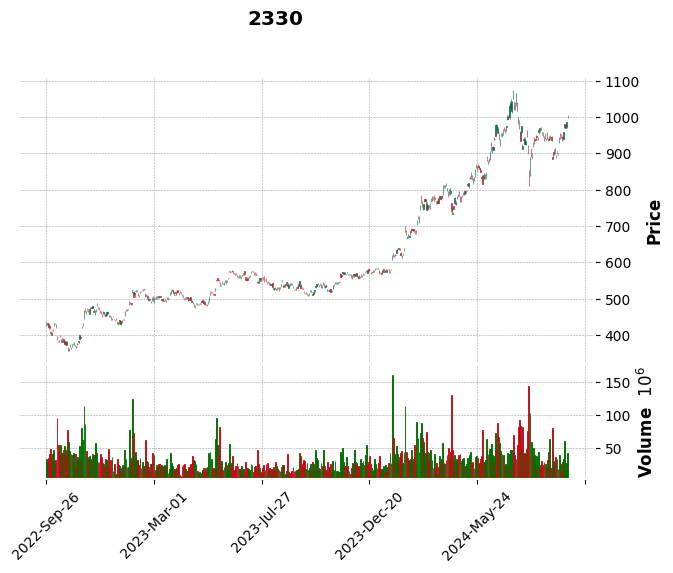

In [11]:

# 下載台灣 2330 (台積電) 的股票數據
taiwan_2330 = yf.Ticker("2330.TW")
df = taiwan_2330.history(period="2y")

# 檢查數據是否成功下載
if df.empty:
    print("股票數據下載失敗或沒有數據。")
else:
    # 繪製 K 線圖
    mpf.plot(df, type='candle', style='charles', title='2330', volume=True)

In [ ]:
msft = yf.Ticker("0056.TW")
#印出資訊
# get all stock info
msft.info

# get historical market data
hist = msft.history(period="2y")
msft.history_metadata
#print(hist)

{'currency': 'TWD',
 'symbol': '0056.TW',
 'exchangeName': 'TAI',
 'fullExchangeName': 'Taiwan',
 'instrumentType': 'ETF',
 'firstTradeDate': 1199235600,
 'regularMarketTime': 1726637412,
 'hasPrePostMarketData': False,
 'gmtoffset': 28800,
 'timezone': 'CST',
 'exchangeTimezoneName': 'Asia/Taipei',
 'regularMarketPrice': 37.72,
 'fiftyTwoWeekHigh': 38.0,
 'fiftyTwoWeekLow': 37.56,
 'regularMarketDayHigh': 38.0,
 'regularMarketDayLow': 37.56,
 'regularMarketVolume': 28390408,
 'longName': 'Yuanta/P-shares Taiwan Dividend Plus ETF',
 'shortName': 'YUANTA SECURITIES INV TRUST CO ',
 'chartPreviousClose': 28.28,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'CST',
   'end': 1726621200,
   'start': 1726621200,
   'gmtoffset': 28800},
  'regular': {'timezone': 'CST',
   'end': 1726637400,
   'start': 1726621200,
   'gmtoffset': 28800},
  'post': {'timezone': 'CST',
   'end': 1726637400,
   'start': 1726637400,
   'gmtoffset': 28800}},
 'dataGranularity': '1d',
 'range': '2y